In [46]:
import numpy as np
from sklearn.model_selection import train_test_split

In [47]:
from google.colab import files
files.upload()

Saving googlecolab.csv to googlecolab (1).csv


{'googlecolab (1).csv': b"No,Nama Siswa,Status Ortu,Penghasilan,Kepemilikan Rumah,Jumlah Tanggungan,KIS Atau SKTM,Nilai Rata-Rata,Keterangan\r\n1,Aedil Lutfi,HH,Rendah,Sendiri,Rendah,Ya,Baik,Layak\r\n2,Ahmad Muhammad Assyifani,HH,Tinggi,Sendiri,Sedang,Tidak,Baik Sekali,Tidak Layak\r\n3,Aisyah Ailani Arka,WH,Rendah,Sendiri,Rendah,Ya,Baik,Layak\r\n4,Akisa Naura Anjani,HH,Rendah,Sendiri,Rendah,Tidak,Baik,Tidak Layak\r\n5,Aldi Bagus Sugiarto,HH,Sedang,Sendiri,Rendah,Tidak,Baik,Tidak Layak\r\n6,Aulia Putri Samsuri,HH,Sedang,Sewa Bulanan,Rendah,Tidak,Baik,Tidak Layak\r\n7,Dimas Dwi Ardian,HH,Tinggi,Sendiri,Sedang,Tidak,Baik,Tidak Layak\r\n8,Felicia Andinia Putri,WH,Rendah,Sendiri,Rendah,Ya,Baik,Layak\r\n9,Ferus Al Wachid Durasyid,HH,Rendah,Sendiri,Rendah,Tidak,Baik Sekali,Tidak Layak\r\n10,Hafiz Atma Ardani,HH,Sedang,Sendiri,Rendah,Tidak,Baik Sekali,Tidak Layak\r\n11,Izzan Maulana Xavi,HH,Sedang,Sendiri,Rendah,Tidak,Baik,Tidak Layak\r\n12,Khaneynda Putri Aulia,HW,Sedang,Sendiri,Rendah,Tidak,

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split

datainput = pd.read_csv("googlecolab.csv", delimiter=",")

# Memilih kolom yang relevan untuk fitur (x) dan target (y)
x = datainput[['Status Ortu', 'Penghasilan', 'Kepemilikan Rumah', 'Jumlah Tanggungan', 'KIS Atau SKTM', 'Nilai Rata-Rata']]
y = datainput["Keterangan"]

# Lakukan pemisahan data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

# Memeriksa bentuk data latih dan data uji
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(168, 6)
(72, 6)
(168,)
(72,)


In [49]:
import pandas as pd
from sklearn import preprocessing

datainput = pd.read_csv("googlecolab.csv", delimiter=",")

x = datainput[['Status Ortu','Penghasilan','Kepemilikan Rumah','Jumlah Tanggungan','KIS Atau SKTM','Nilai Rata-Rata']]

# Pemrosesan awal data untuk kolom kategorikal (Status Ayah, Status Ibu, Penghasilan Ayah, Penghasilan Ibu, Kepemilikan Rumah, Jumlah Tanggungan, KIS Atau SKTM, Nilai Rata-Rata)
label_encoder = preprocessing.LabelEncoder()

x['Status Ortu'] = label_encoder.fit_transform(x['Status Ortu'])
x['Penghasilan'] = label_encoder.fit_transform(x['Penghasilan'])
x['Kepemilikan Rumah'] = label_encoder.fit_transform(x['Kepemilikan Rumah'])
x['Jumlah Tanggungan'] = label_encoder.fit_transform(x['Jumlah Tanggungan'])
x['KIS Atau SKTM'] = label_encoder.fit_transform(x['KIS Atau SKTM'])
x['Nilai Rata-Rata'] = label_encoder.fit_transform(x['Nilai Rata-Rata'])

<ipython-input-49-0d89dd84c374>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Status Ortu'] = label_encoder.fit_transform(x['Status Ortu'])
<ipython-input-49-0d89dd84c374>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Penghasilan'] = label_encoder.fit_transform(x['Penghasilan'])
<ipython-input-49-0d89dd84c374>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat


DecisionTree's Accuracy: 0.9722222222222222


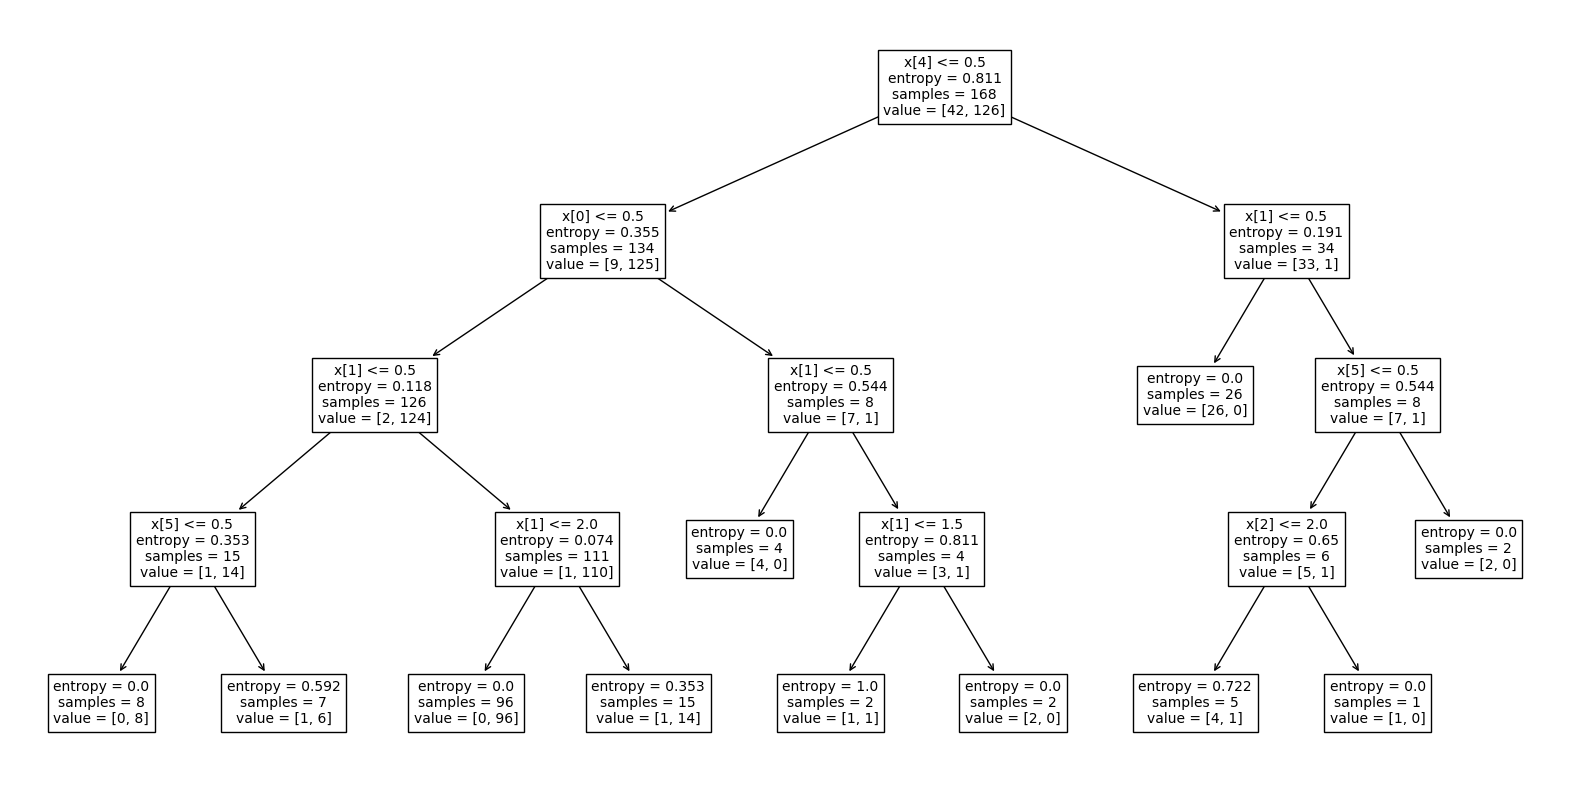

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  # Impor matplotlib untuk membuat plot
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Impor fungsi plot_tree

# Dengan asumsi 'x' berisi fitur Anda dan 'y' berisi variabel target Anda

# Enkode variabel kategori menggunakan LabelEncoder
label_encoder = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object':  # Periksa apakah kolomnya kategorikal
        x[col] = label_encoder.fit_transform(x[col])

# Pisahkan data menjadi set pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

# Inisialisasi dan sesuaikan DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
Tree.fit(x_train, y_train)

# Prediksi menggunakan model terlatih
predicted = Tree.predict(x_test)

# Menghitung dan mencetak akurasi
print("\nDecisionTree's Accuracy:", accuracy_score(y_test, predicted))

# Plot pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(Tree, fontsize=10)
plt.show()

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Dengan asumsi Tree adalah instance DecisionTreeClassifier
Tree.fit(x_train, y_train)
predicted = Tree.predict(x_test)
cm = confusion_matrix(y_test, predicted)
print("Confusion matrix =", cm)
print("Predicted values:", predicted)

Confusion matrix = [[14  1]
 [ 1 56]]
Predicted values: ['Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Layak' 'Tidak Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Layak' 'Tidak Layak' 'Tidak Layak'
 'Tidak Layak' 'Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Layak' 'Tidak Layak' 'Layak' 'Tidak Layak'
 'Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak'
 'Layak' 'Layak' 'Layak' 'Layak' 'Tidak Layak' 'Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Tidak Layak' 'Layak'
 'Tidak Layak' 'Layak' 'Tidak Layak' 'Tidak Layak' 'Layak' 'Tidak Layak'
 'Tidak Layak' 'Tidak Layak' 'Tidak Layak']


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Dengan asumsi Tree adalah instance DecisionTreeClassifier
Tree.fit(x_train, y_train)
predicted = Tree.predict(x_test)
cm = confusion_matrix(y_test, predicted)
akurasi = accuracy_score(y_test, predicted)
print("DecisionTrees's Accuracy (%)", akurasi * 100)

DecisionTrees's Accuracy (%) 97.22222222222221
